In [2]:
import warnings
import pydotplus
from io import StringIO
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score
import collections
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
warnings.filterwarnings('ignore')

In [6]:
# 创建示例数据集，并对数据类别进行独热编码
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


# 保证独热编码后的特征在训练和测试数据中同时存在
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [7]:
features = ['Looks', 'Alcoholic_beverage', 'Eloquence', 'Money_spent']

In [8]:
df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                     'repulsive', 'repulsive', 'handsome']
df_train['Alcoholic_beverage'] = [
    'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                         'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                           'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(
    ['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [9]:
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive']
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [10]:
# 保证独热编码后的特征在训练和测试数据中同时存在
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Money_spent_little,Looks_repulsive,Eloquence_high,Eloquence_average,Money_spent_lots,Alcoholic_beverage_yes,Looks_handsome,Alcoholic_beverage_no
0,0,0,1,0,1,1,1,0
1,1,0,0,0,0,1,1,0
2,0,0,0,1,1,0,1,1
3,1,1,0,1,0,0,0,1
4,0,1,0,0,1,1,0,0
5,0,1,1,0,1,1,0,0
6,0,0,0,1,1,1,1,0


In [11]:
df_test

,Money_spent_little,Looks_repulsive,Eloquence_high,Eloquence_average,Money_spent_lots,Alcoholic_beverage_yes,Looks_handsome,Alcoholic_beverage_no
0,0,0,0,1,1,0,1,1
1,1,0,1,0,0,1,1,0
2,0,1,0,1,1,1,0,0


In [12]:
y

0    0
1    1
2    0
3    1
4    1
5    0
6    0
Name: Will_go, dtype: int64

In [13]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=17)
dt.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=17)

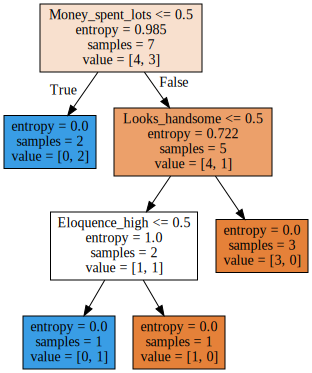

In [14]:
tree_str = export_graphviz(
    dt, feature_names=df_train.columns, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(tree_str)
SVG(graph.create_svg())

In [15]:
balls = [1 for i in range(9)] + [0 for i in range(11)]  # 生成数据
balls

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
[1]*9+[0]*11

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
balls_left = [1]*8+[0]*5
balls_right = [1]*1+[0]*6

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请根据前面的实验内容实现香农熵计算函数 `entropy()`。


In [37]:
# 得到值的统计（一维的）
def get_val_counts(data_1vim):
    df = pd.DataFrame(data_1vim)
    return df.value_counts(normalize=True).values

In [38]:
def entropy(data_1vim):
    nn = get_val_counts(data_1vim)
    return sum([-v*np.log2(v) for v in nn])

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>列表 ball_left 给出状态的熵是多少？

In [40]:
entropy(balls_left)

0.9612366047228759

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>如果有一个 6 面立方体等概率骰子，其熵是多少？

In [41]:
shai_zi = [1, 2, 3, 4, 5, 6]
entropy(shai_zi)


2.584962500721156

<i class="fa fa-question-circle" aria-hidden="true">
接下来，请实现信息增益的计算函数 `information_gain(root, left, right)`。

In [45]:
def information_gain(root, left, right):
    e_root = entropy(root)
    e_left = entropy(left)
    e_right = entropy(right)
    return e_root - len(left)/len(root)*e_left- \
           len(right)/len(root)*e_right

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>将初始数据集拆分为 balls_left 和 balls_right 后的信息增益是多少？

In [46]:
information_gain(balls, balls_left, balls_right)


0.16088518841412436

接下来，我们尝试实现基于信息增益划分函数 `best_feature_to_split`。


In [47]:
def best_feature_to_split(X, y):
    '''信息增益用于特征分割'''
    out = []
    for i in X.columns:
        out.append(information_gain(y, y[X[i] == 0], y[X[i] == 1]))
    return out

In [57]:
y[df_train["Money_spent_little"] ==0]

0    0
2    0
4    1
5    0
6    0
Name: Will_go, dtype: int64

然后，通过递归调用 `best_feature_to_split` 实现一个简单的树构建策略，并输出每一步的熵变化。

In [48]:
def btree(X, y):
    clf = best_feature_to_split(X, y)
    param = clf.index(max(clf))
    # 将X所有行，第param列（增益值最大的列）元素取出来
    # 选择其中等于0和1的索引传递给y
    ly = y[X.iloc[:, param] == 0]
    ry = y[X.iloc[:, param] == 1]
    print('Column_' + str(param) + ' N/Y?')
    print('Entropy: ', entropy(ly), entropy(ry))
    print('N count:', ly.count(), '/', 'Y count:', ry.count())
    if entropy(ly) != 0:
        left = X[X.iloc[:, param] == 0]
        btree(left, ly)
    if entropy(ry) != 0:
        right = X[X.iloc[:, param] == 1]
        btree(right, ry)


In [49]:
best_feature_to_split(df_train, y)

[0.46956521111470695,
 0.12808527889139443,
 0.2916919971380597,
 0.020244207153756077,
 0.46956521111470695,
 0.0059777114237740125,
 0.12808527889139443,
 0.0059777114237740125]

In [50]:
btree(df_train, y)

Column_0 N/Y?
Entropy:  0.7219280948873623 0.0
N count: 5 / Y count: 2
Column_1 N/Y?
Entropy:  0.0 1.0
N count: 3 / Y count: 2
Column_2 N/Y?
Entropy:  0.0 0.0
N count: 1 / Y count: 1


NameError: name 'X_train' is not defined